In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from shadow.plot import *

In [5]:
!ls output/

Tensile1_2022-01-06T14-41-12  Tensile1_2022-01-06T14-59-10
Tensile1_2022-01-06T14-43-36  Tensile1_2022-01-06T15-01-15
Tensile1_2022-01-06T14-44-10  Tensile1_2022-01-06T15-02-09
Tensile1_2022-01-06T14-44-23  Tensile1_2022-01-06T15-08-39
Tensile1_2022-01-06T14-44-38  Tensile1_2022-01-06T15-10-29
Tensile1_2022-01-06T14-45-09  Tensile1_2022-01-06T15-12-48
Tensile1_2022-01-06T14-46-02  Tensile1_2022-01-06T15-13-16
Tensile1_2022-01-06T14-46-11  Tensile1_2022-01-06T15-13-51
Tensile1_2022-01-06T14-46-38  Tensile1_2022-01-06T15-14-35
Tensile1_2022-01-06T14-47-41  Tensile1_2022-01-06T15-23-47
Tensile1_2022-01-06T14-47-56  Tensile1_2022-01-06T15-27-51
Tensile1_2022-01-06T14-48-20  Tensile1_2022-01-06T16-06-48
Tensile1_2022-01-06T14-51-41  Tensile1_2022-01-06T17-40-34
Tensile1_2022-01-06T14-51-51  Tensile1_2022-01-06T17-44-04
Tensile1_2022-01-06T14-55-42  Tensile1_2022-01-07T17-48-17
Tensile1_2022-01-06T14-55-49  Tensile1_2022-01-07T17-53-31
Tensile1_2022-01-06T14-59-02


In [11]:
force=[]
disp=[]

folder = os.listdir("output")[-1]

dir = f"output/{folder}"
keys = [int(i.split(".")[0].split("_")[-1]) for i in os.listdir(dir) if ".data" in i]
keys.sort()
L0 = 1.0
A = 1.0
for i in keys:
    filename = f'{dir}/env_1_step_{i}.data'
    df = pd.read_csv(filename, header=None, skiprows=2, delimiter="\s")
    df.columns = ['ID', 'type', 'x', 'y', 'z', 'vx', 'vy', 'vz', 'ax', 'ay', 'az', 'mass', 'volume']
    Fll = df[df['x']<0.5].ax.sum()
    Flr = df[df['x']>5.5].ax.sum()

    # Disp in X direction
    L = df.x.max() - df.x.min()
    if i==keys[0]:
        L0 = L
    de = L - L0
    force.append(((abs(Fll)+abs(Flr)))/2)
    disp.append(de)


/home/ravinder/VENV/jax_cpu/lib/python3.9/site-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


60000.0


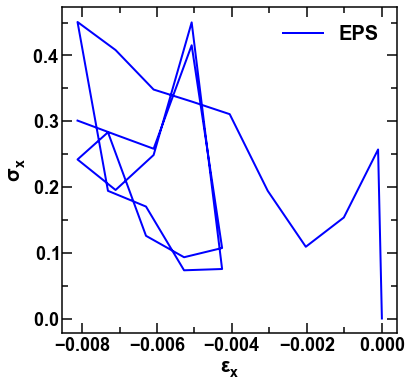

In [12]:
plt.plot(np.array(disp)/(L0-1), np.array(force)/A, label="EPS")
plt.ylabel("$\sigma_{x}$")
plt.xlabel("$\epsilon_x$")
plt.legend()
# plt.xlim([0, 0.01])

# plt.text(0.05, 0.2, "Tensile test")
# savefig("elasto-plastic2.png", dpi=600)
print(1200/0.02)

# Image

<div style="width:200px">
<img src="elasto-plastic1.png"/>
</div>